# EDA


## Table of contents
1. [Training Data](#train)
2. [Testing Data](#test)
3. [Spraying Data](#spray)
4. [Weather Data](#weather)


## External Research

## Imports
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import math

## Training Data<a name=train></a>
---

In [2]:
train = pd.read_csv('../data/train_clean.csv')

In [3]:
# defining a dataframe of training data where the species are 
train_no_spec_dup = train.drop_duplicates(subset=['date', 'address', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'week', 'weekday'])

In [4]:
train_no_spec_dup

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,week,weekday
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,2
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,22,2
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,22,2
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,22,2
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007,5,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1,2013,9,39,4
9689,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0,2013,9,39,4
9690,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0,2013,9,39,4
9691,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0,2013,9,39,4


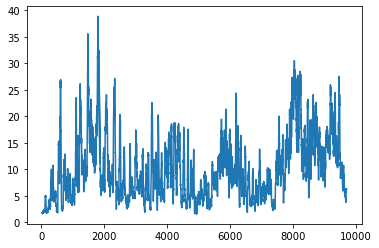

In [5]:
plt.plot(train['nummosquitos'].rolling(28).mean())

### `date`, (`year`, `month`, `week`, `dayofweek`)

In [6]:
# check to see if there are missing dates
missing_dates = pd.date_range(start = train_no_spec_dup['date'][0], end = train_no_spec_dup['date'][9692] ).difference(train['date'])

In [7]:
# make the values into a dataframe
missing_dates = pd.DataFrame(missing_dates, columns=['missing_dates'])

In [8]:
# calculate the year, month, week, day of week columns for our missing dates
missing_dates['year'] = missing_dates['missing_dates'].apply(lambda x: x.year)
missing_dates['month'] = missing_dates['missing_dates'].apply(lambda x: x.month)
missing_dates['week'] = missing_dates['missing_dates'].apply(lambda x: x.week)
missing_dates['weekday'] = missing_dates['missing_dates'].apply(dt.date.isoweekday)

In [9]:
# Checking the value count for missing years
missing_dates['year'].value_counts().sort_index()

2007    184
2008    366
2009    339
2010    365
2011    347
2012    366
2013    251
Name: year, dtype: int64

Our training data is missing data from each year. In particular, it looks like it is completely missing data from 2008, 2010, and 2012 as there are at least 365 days of missing dates in each of those years.

Just to confirm our observations, we can take the value counts from our training data itself.


In [10]:
# checking the value counts for year in our training data
train_no_spec_dup['year'].value_counts().sort_index()

2007    2935
2009    1957
2011    1864
2013    2238
Name: year, dtype: int64

In [173]:
train[train['wnvpresent']==1].count()

date                      503
address                   503
species                   503
block                     503
street                    503
trap                      503
addressnumberandstreet    503
latitude                  503
longitude                 503
addressaccuracy           503
nummosquitos              503
wnvpresent                503
year                      503
month                     503
week                      503
weekday                   503
dtype: int64

In [170]:
# finding percdnt
train_no_spec_dup[(train_no_spec_dup['year']==2007) & (train_no_spec_dup['wnvpresent'] == 1)].shape[0]

192

Text(0, 0.5, 'Number of Date Occurrences in Training Data')

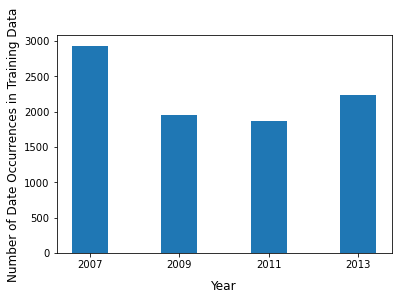

In [91]:
plt.tight_layout()
plt.bar(train_no_spec_dup['year'].value_counts().sort_index().index,
        train_no_spec_dup['year'].value_counts().sort_index())

plt.xlabel('Year', labelpad=10, fontsize=12)
plt.xticks(ticks=train_no_spec_dup['year'].value_counts().sort_index().index, 
           labels=['2007', '2009', '2011', '2013',])
plt.ylabel('Number of Date Occurrences in Training Data', fontsize=12)

As we can see, 2008, 2010, and 2012 are completely missing from our training data.

In [12]:
# checking the value count for missing months
missing_dates['month'].value_counts().sort_index()

1     186
2     170
3     186
4     180
5     187
6     189
7     196
8     191
9     184
10    183
11    180
12    186
Name: month, dtype: int64

Missing months are roughly evenly distributed.

In [13]:
# checking the value counts for month in our training data
train_no_spec_dup['month'].value_counts().sort_index()

5       76
6     1395
7     2257
8     3049
9     1958
10     259
Name: month, dtype: int64

Text(0, 0.5, 'Number of Date Occurrences in Training Data')

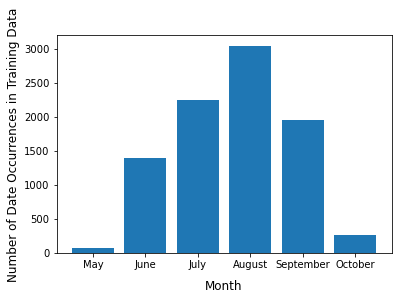

In [92]:
plt.tight_layout()
plt.bar(train_no_spec_dup['month'].value_counts().sort_index().index,
        train_no_spec_dup['month'].value_counts().sort_index())
plt.xlabel('Month', labelpad=10, fontsize=12)
plt.xticks(ticks=train_no_spec_dup['month'].value_counts().sort_index().index, 
           labels=['May', 'June', 'July', 'August', 'September', 'October',])
plt.ylabel('Number of Date Occurrences in Training Data', fontsize=12)

However, the months in our training data is very much skewed in an almost normal distriubtion, with a far greater sample of August and the tail ends at May and October. This are the Summer and Autumn months for Chicago, presumably because there are few to no mosquitoes in Spring and Winter. But this means we have no data for Spring and Winter months.

In [15]:
# checking the value count for missing weeks
missing_dates['week'].value_counts().sort_index()

1     42
2     42
3     42
4     42
5     42
6     42
7     42
8     42
9     42
10    42
11    42
12    42
13    42
14    42
15    42
16    42
17    42
18    42
19    42
20    42
21    42
22    46
23    43
24    46
25    45
26    42
27    47
28    42
29    44
30    43
31    42
32    43
33    43
34    44
35    43
36    44
37    45
38    43
39    41
40    40
41    41
42    42
43    42
44    42
45    42
46    42
47    42
48    42
49    42
50    42
51    42
52    42
53     7
Name: week, dtype: int64

Missing weeks are roughly evenly distributed, with the only exception to be the 53rd week which would be due to leap years.

In [16]:
# checking the value counts for week in our training data
train_no_spec_dup['week'].value_counts().sort_index()

22     76
23    348
24    299
25    311
26    421
27     84
28    896
29    504
30    605
31    964
32    636
33    643
34    683
35    410
36    348
37    490
38    593
39    424
40    234
41     25
Name: week, dtype: int64

Text(0, 0.5, 'Number of Date Occurrences in Training Data')

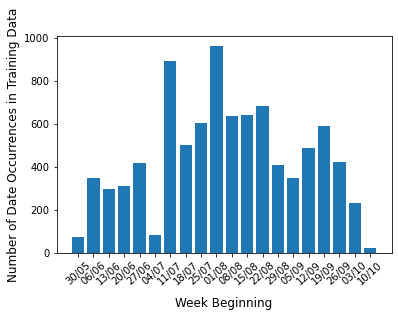

In [98]:
plt.tight_layout()
plt.bar(train_no_spec_dup['week'].value_counts().sort_index().index,
        train_no_spec_dup['week'].value_counts().sort_index())
plt.xlabel('Week Beginning', labelpad=10, fontsize=12)
plt.xticks(ticks=train_no_spec_dup['week'].value_counts().sort_index().index, 
           labels=['30/05', '06/06', '13/06', '20/06', '27/06', '04/07', '11/07', '18/07', '25/07', '01/08', '08/08', 
                   '15/08', '22/08', '29/08', '05/09', '12/09', '19/09', '26/09', '03/10', '10/10'], rotation=42)
plt.ylabel('Number of Date Occurrences in Training Data', fontsize=12)

The training data is highly irregular in terms of weeks. It only encompasses the last week of May (22nd week of the year) to the 1st week of October (41st week of the year). These number also correlate with the month value counts, as May and October are the months that occur most infrequently.

In [18]:
# checking the value count for missing days of week
missing_dates['weekday'].value_counts().sort_index()

1    317
2    319
3    320
4    307
5    295
6    330
7    330
Name: weekday, dtype: int64

Missing weekdays are roughly evenly distributed

In [19]:
# checking the value counts for days of week in our training data
train_no_spec_dup['weekday'].value_counts().sort_index()

1    1129
2     910
3    1274
4    2255
5    3426
Name: weekday, dtype: int64

Text(0, 0.5, 'Number of Date Occurrences in Training Data')

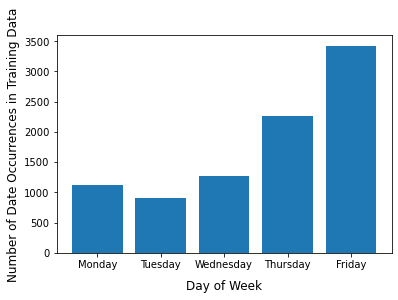

In [101]:
plt.tight_layout()
plt.bar(train_no_spec_dup['weekday'].value_counts().sort_index().index,
        train_no_spec_dup['weekday'].value_counts().sort_index())
plt.xlabel('Day of Week', labelpad=10, fontsize=12)
plt.xticks(ticks=train_no_spec_dup['weekday'].value_counts().sort_index().index, 
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],)
plt.ylabel('Number of Date Occurrences in Training Data', fontsize=12)

Training data only has weekdays, with aTuesday being the least frequent occurrence and Friday being the most frequent occurrence 

## Testing Data<a name=test></a>
---

In [134]:
test = pd.read_csv('../data/test_clean.csv')

### `year`

In [150]:
train['year'].value_counts().sort_index()

2007    3231
2009    2139
2011    2000
2013    2323
Name: year, dtype: int64

In [151]:
test['year'].value_counts().sort_index()

2008    30498
2010    36557
2012    27115
2014    22123
Name: year, dtype: int64

### `month`

In [152]:
train['month'].value_counts().sort_index()

5       83
6     1487
7     2427
8     3308
9     2112
10     276
Name: month, dtype: int64

In [153]:
test['month'].value_counts().sort_index()

6     19478
7     35665
8     33115
9     25612
10     2423
Name: month, dtype: int64

### `week`

In [154]:
train['week'].value_counts().sort_index()

22      83
23     376
24     316
25     329
26     450
27      90
28     941
29     554
30     653
31    1087
32     678
33     700
34     724
35     434
36     378
37     524
38     646
39     454
40     250
41      26
Name: week, dtype: int64

In [155]:
test['week'].value_counts().sort_index()

22    1212
23    3642
24    4856
25    4876
26    7321
27    3649
28    8686
29    7405
30    9819
31    7392
32    7346
33    8580
34    7360
35    7331
36    4899
37    8563
38    7284
39    3648
40    2424
Name: week, dtype: int64

### `weekday`

In [156]:
train['weekday'].value_counts().sort_index()

1    1210
2     983
3    1438
4    2403
5    3659
Name: weekday, dtype: int64

In [157]:
test['weekday'].value_counts().sort_index()

1    17159
2    13521
3     6081
4    41568
5    37964
Name: weekday, dtype: int64

## Spraying Data<a name=spray></a>
---

In [21]:
# reading in the spraying data
spray = pd.read_csv('../data/spray_clean.csv')

In [103]:
spray

,date,latitude,longitude,year,month,week,weekday
0,2011-08-29,42.391623,-88.089163,2011,8,35,1
1,2011-08-29,42.391348,-88.089163,2011,8,35,1
2,2011-08-29,42.391022,-88.089157,2011,8,35,1
3,2011-08-29,42.390637,-88.089158,2011,8,35,1
4,2011-08-29,42.390410,-88.088858,2011,8,35,1
...,...,...,...,...,...,...,...
14289,2013-09-05,42.006587,-87.812355,2013,9,36,4
14290,2013-09-05,42.006192,-87.816015,2013,9,36,4
14291,2013-09-05,42.006022,-87.817392,2013,9,36,4
14292,2013-09-05,42.005453,-87.817423,2013,9,36,4


In [104]:
spray_no_loc_dup = spray.drop_duplicates(subset=['date', 'year', 'month', 'week', 'weekday'])

In [108]:
spray_no_loc_dup

,date,latitude,longitude,year,month,week,weekday
0,2011-08-29,42.391623,-88.089163,2011,8,35,1
95,2011-09-07,41.981433,-87.787777,2011,9,36,3
1668,2013-07-17,41.997728,-87.767532,2013,7,29,3
3870,2013-07-25,41.960520,-87.739783,2013,7,30,4
5477,2013-08-08,41.919128,-87.696737,2013,8,32,4
6672,2013-08-15,41.944718,-87.808187,2013,8,33,4
9340,2013-08-16,41.960033,-87.785495,2013,8,33,5
9481,2013-08-22,41.885083,-87.719797,2013,8,34,4
11068,2013-08-29,41.785637,-87.713003,2013,8,35,4
13370,2013-09-05,41.997975,-87.790912,2013,9,36,4


### `date`, (`year`, `month`, `week`, `dayofweek`)

In [22]:
# check to see if there are missing dates
missing_dates = pd.date_range(start = spray['date'][0], end = spray['date'][14293] ).difference(train['date'])

In [23]:
# make the values into a dataframe
missing_dates_spray = pd.DataFrame(missing_dates, columns=['missing_dates'])

In [24]:
# calculate the year, month, week, day of week columns for our missing dates
missing_dates_spray['year'] = missing_dates_spray['missing_dates'].apply(lambda x: x.year)
missing_dates_spray['month'] = missing_dates_spray['missing_dates'].apply(lambda x: x.month)
missing_dates_spray['week'] = missing_dates_spray['missing_dates'].apply(lambda x: x.week)
missing_dates_spray['weekday'] = missing_dates_spray['missing_dates'].apply(dt.date.isoweekday)

In [111]:
train['date'].value_counts().sort_index()

2007-05-29     25
2007-06-05     60
2007-06-26     69
2007-06-29     46
2007-07-02     74
             ... 
2013-08-29    137
2013-09-06    141
2013-09-12    138
2013-09-19    111
2013-09-26     92
Name: date, Length: 95, dtype: int64

In [26]:
# Checking the value count for missing years
missing_dates_spray['year'].value_counts().sort_index()

2011    119
2012    366
2013    234
Name: year, dtype: int64

Our training data only stretches from 2011 to 2013. While 2011 and 2013 in our training data are incomplete, 2012 is completely missing; there should be no date in our spray data.

Just to confirm our observations, we can take the value counts from our training data itself.


In [27]:
# checking the value counts for year in our training data
spray['year'].value_counts().sort_index()

2011     1668
2013    12626
Name: year, dtype: int64

Text(0, 0.5, 'Number of Date Occurrences in Training Data')

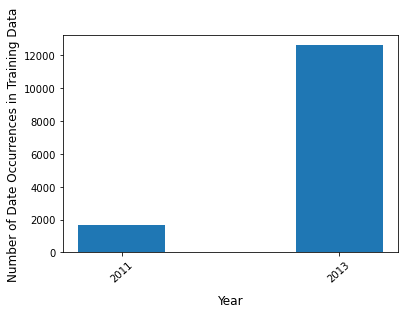

In [102]:
    plt.tight_layout()
    plt.bar(spray['year'].value_counts().sort_index().index,
            spray['year'].value_counts().sort_index())
    plt.xlabel('Year', labelpad=10, fontsize=12)
    plt.xticks(ticks=spray['year'].value_counts().sort_index().index, 
               labels=['2011', '2013'],)
    plt.ylabel('Number of Date Occurrences in Spraying Data', fontsize=12)

As we can see, There is no spraying data for 2012.

In [29]:
# checking the value counts of missing months
missing_dates_spray['month'].value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     55
7     58
8     60
9     59
10    62
11    60
12    62
Name: month, dtype: int64

Missing months are roughly evenly distributed.

In [30]:
# checking the value counts of months in our spraying data
spray['month'].value_counts().sort_index()

7    3809
8    7988
9    2497
Name: month, dtype: int64

Text(0, 0.5, 'Number of Spraying Occurrences')

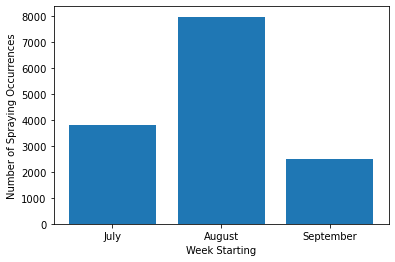

In [69]:
plt.bar(spray['month'].value_counts().sort_index().index,
        spray['month'].value_counts().sort_index())
plt.xlabel('Week Starting')
plt.xticks(ticks=spray['month'].value_counts().sort_index().index, 
           labels=['July', 'August', 'September',])
plt.ylabel('Number of Spraying Occurrences')

Although the 3 months that our spraying data consists of (July, August, and September) are typically the part of the [mosquito season](https://www.nbcchicago.com/news/local/chicago-named-one-of-the-worst-cities-for-mosquitoes-in-us/2517461/), it has been found that mosquito breeding season can begin as early as May and last through September, which means that we might see higher numbers of mosquitoes caught in May, June, the earlier weeks of June, and the later weeks of September when there has not been any spraying done to control the mosquito population.

In [49]:
# checking the value count for missing weeks
missing_dates_spray['week'].value_counts().sort_index()

1     14
2     14
3     14
4     14
5     14
6     14
7     14
8     14
9     14
10    14
11    14
12    14
13    14
14    14
15    14
16    14
17    14
18    14
19    14
20    14
21    14
22    14
23    13
24    13
25    13
26    12
27    14
28    12
29    13
30    13
31    13
32    13
33    13
34    13
35    18
36    18
37    12
38    13
39    13
40    14
41    14
42    14
43    14
44    14
45    14
46    14
47    14
48    14
49    14
50    14
51    14
52    14
Name: week, dtype: int64

Missing weeks are roughly evenly distributed.

In [50]:
# checking the value counts for week in our training data
spray['week'].value_counts().sort_index()

29    2202
30    1607
32    1195
33    2809
34    1587
35    2397
36    2497
Name: week, dtype: int64

Text(0, 0.5, 'Number of Spraying Occurrences')

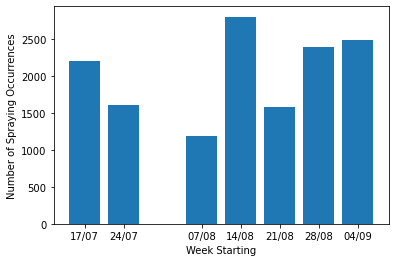

In [68]:
plt.bar(spray['week'].value_counts().sort_index().index,
        spray['week'].value_counts().sort_index())
plt.xlabel('Week Starting')
plt.xticks(ticks=spray['week'].value_counts().sort_index().index, 
           labels=['17/07', '24/07', '07/08', '14/08', '21/08', '28/08', '04/09'])
plt.ylabel('Number of Spraying Occurrences')

The spraying data is highly irregular in terms of weeks. It only encompasses the 17th of July (29th week of the year) to the 4th of September (36th week of the year) while completely omitting the week beginning 31st of July (31st week of the year). This suggests that we should see an increase in the number of mosquitoes caught in the 1st week of August when compared to its neighbouring weeks.

In [35]:
# checking the value count for missing days of week
missing_dates_spray['weekday'].value_counts().sort_index()

1    104
2    106
3    106
4     98
5     95
6    105
7    105
Name: weekday, dtype: int64

Missing weekdays are roughly evenly distributed

In [36]:
# checking the value counts for days of week in our training data
spray['weekday'].value_counts().sort_index()

1       95
3     3775
4    10283
5      141
Name: weekday, dtype: int64

Text(0, 0.5, 'Number of Spraying Occurrences')

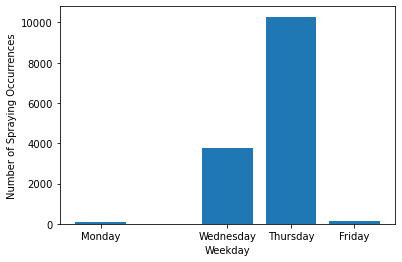

In [73]:
plt.tight_layout()
plt.bar(spray['weekday'].value_counts().sort_index().index,
        spray['weekday'].value_counts().sort_index())
plt.xlabel('Weekday',)
plt.xticks(ticks=spray['weekday'].value_counts().sort_index().index, 
           labels=['Monday', 'Wednesday', 'Thursday', 'Friday',])
plt.ylabel('Number of Spraying Occurrences')

Spraying data only has weekdays, with no data for Tuesdays, and minimal data for Monday and Friday. Wednesday and Thursday by and large have the most data. As such, we should expect our model to make better predictions for Wednesdays and Thursdays given that the dates are within our spraying data months.

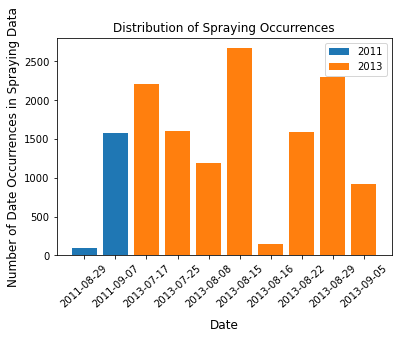

In [133]:
# Plotting the distribution of spraying occurrences by date
plt.tight_layout()
plt.title('Distribution of Spraying Occurrences')
plt.bar(spray[spray['year'] == 2011]['date'].value_counts().sort_index().index,
        spray[spray['year'] == 2011]['date'].value_counts().sort_index())
plt.bar(spray[spray['year'] == 2013]['date'].value_counts().sort_index().index,
        spray[spray['year'] == 2013]['date'].value_counts().sort_index())
plt.xlabel('Date', labelpad=10, fontsize=12)
plt.xticks(ticks=spray['date'].value_counts().sort_index().index, 
           labels=spray['date'].value_counts().sort_index().index,
           rotation=42)
plt.ylabel('Number of Date Occurrences in Spraying Data', fontsize=12)
plt.legend(['2011', '2013'])

From the above chart, we can see that in addition to our spraying data only consisting of 10 occurrences of spraying from 2011 to 2013, there is also a huge imbalance in our spraying data, with most of the spraying data being gathered from 2013.